In [325]:
import pandas as pd
import matplotlib.pyplot as plt

In [343]:
df = pd.read_csv("/Users/tsy/Desktop/google/google_asr/csv/adaptation/test_one.csv")
dfn = pd.read_csv("/Users/tsy/Desktop/google/google_asr/csv/adaptation/test_nbest.csv")

In [337]:
df

,speaker,filename,sentence_confidence,min_word_confidence,wer,per
0,s34,prwg7p,0.902322,0.789326,0.333333,0.050000
1,s34,pgaa8a,0.873767,0.741537,0.666667,0.352941
2,s34,lbaa3n,0.596308,0.429689,1.000000,0.615385
3,s34,sgal7n,0.917948,0.828650,0.166667,0.117647
4,s34,sbbd9n,0.833761,0.745126,0.333333,0.133333
...,...,...,...,...,...,...
3395,s23,lgbk2p,0.665961,0.446799,0.500000,0.187500
3396,s23,sgig2p,0.824234,0.690454,0.333333,0.235294
3397,s23,sbwf6p,0.897976,0.779195,0.166667,0.052632
3398,s23,bwbz1a,0.591271,0.219105,0.666667,0.444444


In [345]:
# df.describe()
dfn.describe()

,sentence_confidence,wer,per
count,3400.000000,3400.000000,3400.000000
mean,0.821533,0.475392,0.307269
std,0.091963,0.233436,0.166358
min,0.226763,0.000000,0.000000
25%,0.777567,0.333333,0.200000
50%,0.844917,0.500000,0.277778
75%,0.884312,0.666667,0.400000
max,0.954677,1.166667,1.000000


In [349]:
a=df.loc[df['per'] <= 0.05]
a.describe()
# b=df.groupby('per')
# b.describe()

,sentence_confidence,min_word_confidence,wer,per
count,107.000000,107.000000,107.000000,107.000000
mean,0.855471,0.698249,0.037383,0.002781
std,0.073395,0.167688,0.092452,0.011468
min,0.456440,0.217215,0.000000,0.000000
25%,0.833749,0.623376,0.000000,0.000000
50%,0.871573,0.766346,0.000000,0.000000
75%,0.897258,0.808161,0.000000,0.000000
max,0.935702,0.864476,0.333333,0.050000


In [350]:
b=dfn.loc[dfn['per'] <= 0.05]
b.describe()

,sentence_confidence,wer,per
count,96.000000,96.000000,96.000000
mean,0.869040,0.031250,0.003100
std,0.043333,0.088233,0.012072
min,0.732107,0.000000,0.000000
25%,0.846612,0.000000,0.000000
50%,0.877711,0.000000,0.000000
75%,0.900168,0.000000,0.000000
max,0.935702,0.333333,0.050000


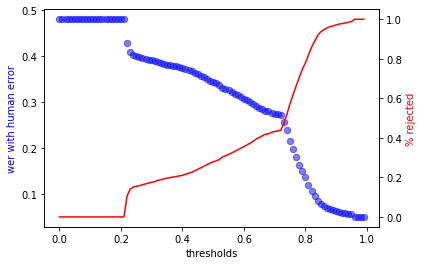

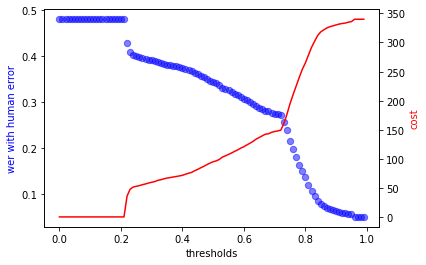

In [342]:
thresholds = []
rej_percents = []
acc_wer = []
ave_wer = []
human_wer = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = df[df['min_word_confidence'] < threshold].shape[0]
    rej_percent = reject / df.shape[0]
    rej_percents.append(rej_percent)
    
    accept = df[df['min_word_confidence'] > threshold]['wer'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        wer_mean = sum(accept) / len(accept)
#     else:
#         wer_mean = 0.5
    acc_wer.append(wer_mean)
    
    # average overall WER
    allwer = sum(accept) / df.shape[0]
    ave_wer.append(allwer)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallwer = (sum(accept) + human_error) / df.shape[0]
    human_wer.append(overallwer)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01


# plt.scatter(rej_percents, acc_wer, alpha=0.5)
# plt.xlabel('percentage of utterances rejected')
# plt.ylabel('wer of accepted utterances')
# plt.show()

# plt.scatter(thresholds, acc_wer, alpha=0.5)
# plt.xlabel('thresholds')
# plt.ylabel('wer of accepted utterances')
# plt.show()

# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.scatter(thresholds, acc_wer, s=40, alpha=0.5)
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('wer of accepted utterances')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(thresholds, human_wer, s=40, alpha=0.5, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('wer with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# ax1.scatter(thresholds, ave_wer, s=40, alpha=0.5)
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('thresholds')
# ax1.set_ylabel('wer of all utterances')
# ax2.set_ylabel('% rejected', color='r')
# plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(thresholds, human_wer, s=40, alpha=0.5, color='b')
ax2.plot(thresholds, cost, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('wer with human error', color='b')
ax2.set_ylabel('cost', color='r')
plt.show()

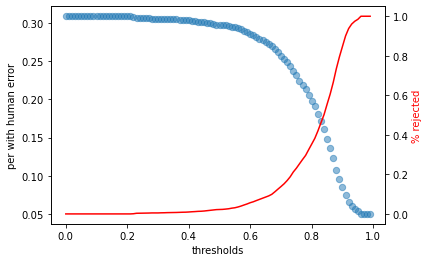

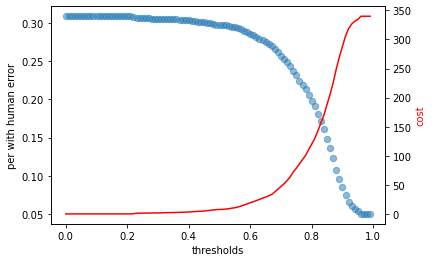

In [341]:
thresholds = []
rej_percents = []
acc_per = []
ave_per = []
human_per = []
cost = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    
    # reject percentage
    reject = df[df['sentence_confidence'] < threshold].shape[0]
    rej_percent = reject / df.shape[0]
    rej_percents.append(rej_percent)
    
    accept = df[df['sentence_confidence'] > threshold]['per'].to_list()
    
    # average accepted WER:
    if len(accept) != 0:
        per_mean = sum(accept) / len(accept)
    acc_per.append(per_mean)
    
    # average overall WER
    allper = sum(accept) / df.shape[0]
    ave_per.append(allper)
    
    # overall WER with human errors
    human_error = reject * 0.05
    overallper = (sum(accept) + human_error) / df.shape[0]
    human_per.append(overallper)
    
    # overall cost
    costs = 0.1 * reject
    cost.append(costs)
    
    threshold += 0.01

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(thresholds, human_per, s=40, alpha=0.5, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('% rejected', color='r')
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(thresholds, human_per, s=40, alpha=0.5, color='b')
ax2.plot(thresholds, cost, color='r')

ax1.set_xlabel('thresholds')
ax1.set_ylabel('per with human error', color='b')
ax2.set_ylabel('cost', color='r')
plt.show()

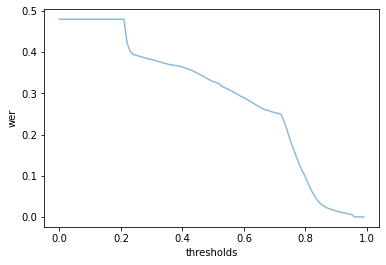

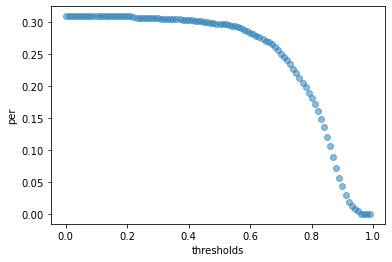

In [346]:
plt.plot(thresholds, ave_wer, alpha=0.5)
plt.xlabel('thresholds')
plt.ylabel('wer')
plt.show()

plt.scatter(thresholds, ave_per, alpha=0.5)
plt.xlabel('thresholds')
plt.ylabel('per')
plt.show()

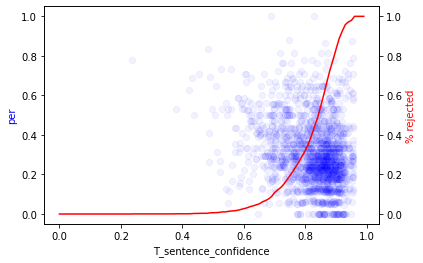

In [282]:
# thresholds = []
# rej_percents = []
# threshold = 0
# while threshold <= 1:
#     thresholds.append(threshold)
#     rej_percent = df[df['min_word_confidence'] < threshold].shape[0] / df.shape[0]
#     rej_percents.append(rej_percent)
#     threshold += 0.01

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.scatter(df['min_word_confidence'], df['wer'], s=40, alpha=0.05, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('T_min word confidence')
# ax1.set_ylabel('wer', color='b')
# ax2.set_ylabel('% rejected', color='r')

# plt.show()

# thresholds = []
# rej_percents = []
# threshold = 0
# while threshold <= 1:
#     thresholds.append(threshold)
#     rej_percent = df[df['sentence_confidence'] < threshold].shape[0] / df.shape[0]
#     rej_percents.append(rej_percent)
#     threshold += 0.01

# fig, ax1 = plt.subplots()

# ax2 = ax1.twinx()
# ax1.scatter(df['sentence_confidence'], df['per'], s=40, alpha=0.05, color='b')
# ax2.plot(thresholds, rej_percents, color='r')

# ax1.set_xlabel('T_sentence_confidence')
# ax1.set_ylabel('per', color='b')
# ax2.set_ylabel('% rejected', color='r')

# plt.show()

In [249]:
dfn = pd.read_csv("/Users/tsy/Desktop/google/shilin/csv_sc2/test_nbest.csv")

In [176]:
dfn

,spk,filename,sentence_confidence,min_word_confidence,wer,mer,wil
0,s5,lwws2p,0.758950,u,0.333333,0.333333,0.555556
1,s5,bbwm1s,0.803436,u,0.333333,0.333333,0.466667
2,s5,lgie7s,0.700610,u,0.500000,0.428571,0.619048
3,s5,pgaj8n,0.865092,u,0.500000,0.500000,0.750000
4,s5,lgir6p,0.823254,u,0.333333,0.333333,0.555556
...,...,...,...,...,...,...,...
895,s12,srwa7n,0.873545,u,0.166667,0.166667,0.305556
896,s12,swia4a,0.840774,u,0.166667,0.166667,0.305556
897,s12,bgwn1n,0.908214,u,0.333333,0.333333,0.555556
898,s12,swwb5p,0.898377,u,0.166667,0.166667,0.305556


In [242]:
# b=dfn.loc[dfn['wer'] <= 0.2]
# b.describe()
b=dfn.groupby('wer')
b.describe()

sentence_confidence                                          \
                       count      mean       std       min       25%   
wer                                                                    
0.000000                19.0  0.880832  0.062306  0.647292  0.873837   
0.166667               132.0  0.853717  0.053959  0.674945  0.825405   
0.333333               226.0  0.825019  0.082829  0.487439  0.777784   
0.500000               219.0  0.826508  0.078537  0.571545  0.777693   
0.666667               173.0  0.803209  0.091752  0.378714  0.740871   
0.833333                98.0  0.770845  0.113789  0.420064  0.694526   
1.000000                32.0  0.758542  0.115654  0.483928  0.679956   
1.166667                 1.0  0.872747       NaN  0.872747  0.872747   

                                          mer            ...            \
               50%       75%       max  count      mean  ...       75%   
wer                                                      ...             
0.000000  0.893459  0.911063  0.933209   19.0  0.000000  ...  0.000000   
0.166667  0.864774  0.894284  0.954677  132.0  0.166667  ...  0.166667   
0.333333  0.843255  0.881595  0.954677  226.0  0.330805  ...  0.333333   
0.500000  0.836235  0.886423  0.954677  219.0  0.492825  ...  0.500000   
0.666667  0.823508  0.870849  0.954677  173.0  0.654005  ...  0.666667   
0.833333  0.782965  0.851113  0.954677   98.0  0.820275  ...  0.833333   
1.000000  0.770647  0.839833  0.937666   32.0  0.986607  ...  1.000000   
1.166667  0.872747  0.872747  0.872747    1.0  0.875000  ...  0.875000   

                      wil                                                    \
               max  count      mean       std       min       25%       50%   
wer                                                                           
0.000000  0.000000   19.0  0.000000  0.000000  0.000000  0.000000  0.000000   
0.166667  0.166667  132.0  0.304503  0.012089  0.166667  0.305556  0.305556   
0.333333  0.333333  226.0  0.538896  0.041310  0.404762  0.555556  0.555556   
0.500000  0.500000  219.0  0.710018  0.050186  0.500000  0.700000  0.750000   
0.666667  0.666667  173.0  0.845857  0.041405  0.666667  0.833333  0.866667   
0.833333  0.833333   98.0  0.950541  0.024550  0.812500  0.944444  0.958333   
1.000000  1.000000   32.0  0.997768  0.007051  0.976190  1.000000  1.000000   
1.166667  0.875000    1.0  0.979167       NaN  0.979167  0.979167  0.979167   

                              
               75%       max  
wer                           
0.000000  0.000000  0.000000  
0.166667  0.305556  0.305556  
0.333333  0.555556  0.555556  
0.500000  0.750000  0.750000  
0.666667  0.866667  0.888889  
0.833333  0.966667  0.972222  
1.000000  1.000000  1.000000  
1.166667  0.979167  0.979167  

[8 rows x 24 columns]

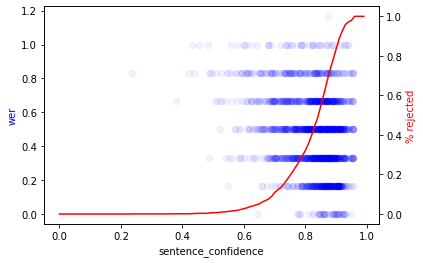

In [164]:
thresholds = []
rej_percents = []
threshold = 0
while threshold <= 1:
    thresholds.append(threshold)
    rej_percent = dfn[dfn['sentence_confidence'] < threshold].shape[0] / dfn.shape[0]
    rej_percents.append(rej_percent)
    threshold += 0.01

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(dfn['sentence_confidence'], dfn['wer'], s=40, alpha=0.05, color='b')
ax2.plot(thresholds, rej_percents, color='r')

ax1.set_xlabel('sentence_confidence')
ax1.set_ylabel('wer', color='b')
ax2.set_ylabel('% rejected', color='r')

plt.show()

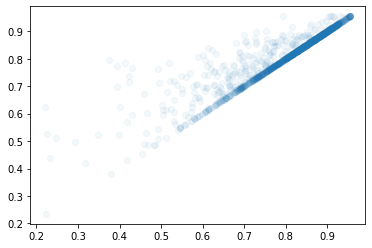

In [165]:
onebest_conf = df['sentence_confidence']
nbest_conf = dfn['sentence_confidence']
plt.scatter(onebest_conf, nbest_conf, alpha=0.05)

In [250]:
df.describe()

,sentence_confidence,min_word_confidence,wer,mer,wil
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.810125,0.631914,0.488137,0.479909,0.649988
std,0.106905,0.222488,0.246498,0.242343,0.242880
min,0.218111,0.216731,0.000000,0.000000,0.000000
25%,0.761045,0.482109,0.333333,0.333333,0.555556
50%,0.838592,0.737376,0.500000,0.500000,0.700000
75%,0.884675,0.795627,0.666667,0.666667,0.866667
max,0.954677,0.954677,1.166667,1.000000,1.000000


In [251]:
dfn.describe()

,sentence_confidence,wer,mer,wil
count,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.823258,0.483333,0.475536,0.646435
std,0.089075,0.243448,0.239535,0.241354
min,0.234410,0.000000,0.000000,0.000000
25%,0.776615,0.333333,0.333333,0.555556
50%,0.842996,0.500000,0.500000,0.700000
75%,0.887068,0.666667,0.666667,0.833333
max,0.954677,1.166667,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f8715f013d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8716be2b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8715f01430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8716e3e490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8716e3ee20>],
 'means': []}

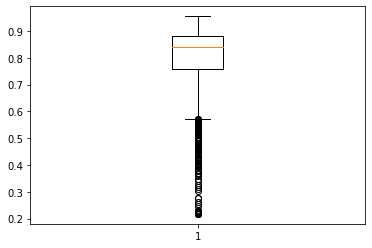

In [348]:
plt.boxplot(df['sentence_confidence'])